In [33]:
# db 접속 
# 우선 db 접속 후 원시 데이터 받기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import DB_PASS

# PostgreSQL 데이터베이스 연결 설정
username = 'psh0826'  # 사용자 이름
password = DB_PASS  # 비밀번호
host = 'localhost'  # 데이터베이스 서버 주소
port = '5432'  # 포트 번호
dbname = 'youtube_videos'  # 데이터베이스 이름
connection_string = f"postgresql://{username}:{password}@{host}:{port}/{dbname}"

# 데이터베이스 연결 엔진 생성
engine = create_engine(connection_string)

# SQL 쿼리 실행 및 데이터프레임으로 변환
query = "SELECT * FROM video_datas;"

# 데이터를 가져올 테이블명
df = pd.read_sql(query, engine)

# 데이터 확인
# info() 에서 수치형 / 문자열 등을 체크한다.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2391 entries, 0 to 2390
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   video_id      2391 non-null   object        
 1   title         2391 non-null   object        
 2   time          2391 non-null   datetime64[ns]
 3   views         2391 non-null   int64         
 4   likes         2391 non-null   int64         
 5   dislikes      2391 non-null   int64         
 6   comments_cnt  2391 non-null   int64         
 7   comments      2391 non-null   object        
 8   query         2391 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 168.2+ KB
None


In [35]:
# 널값 조사
print(df.isnull().sum())



video_id        0
title           0
time            0
views           0
likes           0
dislikes        0
comments_cnt    0
comments        0
query           0
dtype: int64


datetime64[ns]
0      2022-09-01 02:00:07
1      2022-09-01 06:00:04
2      2022-09-01 08:00:05
3      2022-09-01 08:00:09
4      2022-09-01 09:00:06
               ...        
2386   2023-10-31 13:00:19
2387   2023-10-31 13:45:03
2388   2023-10-31 18:02:45
2389   2023-10-31 20:00:12
2390   2023-10-31 23:00:28
Name: time, Length: 2391, dtype: datetime64[ns]
time
2022-09-01 02:00:07    1
2022-09-01 06:00:04    1
2022-09-01 08:00:05    1
2022-09-01 08:00:09    1
2022-09-01 09:00:06    1
                      ..
2023-10-31 13:00:19    1
2023-10-31 13:45:03    1
2023-10-31 18:02:45    1
2023-10-31 20:00:12    1
2023-10-31 23:00:28    1
Name: count, Length: 2373, dtype: int64


/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/IPyt

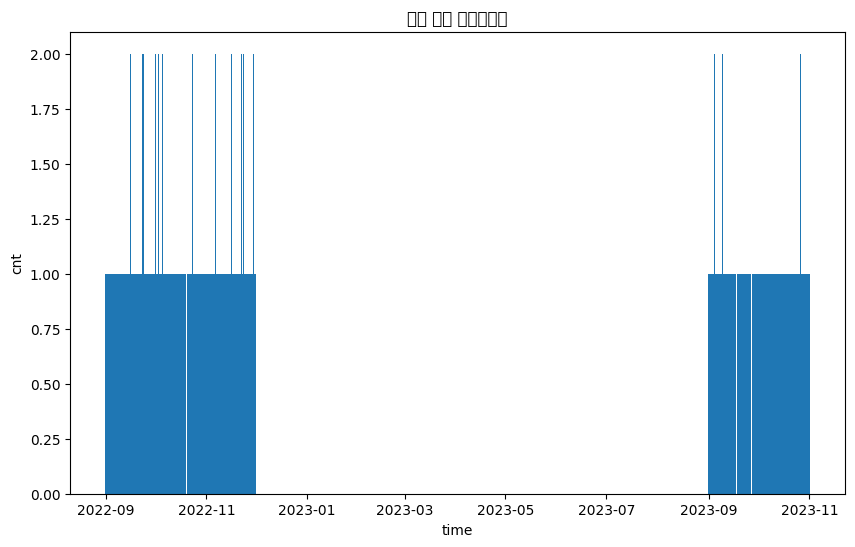

In [57]:
# 수치형 데이터 조사
df.describe()

# 수치형 데이터 중에서 이산형 데이터가 아니거나, 범위형이거나, 지금 처럼 시간이나 날짜 값인지 확인해본다.
# time 컬럼 데이터 확인
# print(df['time'])

# 정렬
print(df['time'].dtypes)
# print(pd.to_datetime(df['time'])) # 필요하면 날짜타입으로 바꾸고
print(df['time'].sort_values())

# 시간대 시각화 

# 날짜를 시간까지만 나오게 하기


# 시간대별로 데이터 개수 확인
time_series_cnt = df['time'].value_counts().sort_index()
print(time_series_cnt)



# 막대 그래프
plt.figure(figsize=(10,6))
plt.bar(time_series_cnt.index, time_series_cnt.values, width = 0.5)
plt.xlabel('time')
plt.ylabel('cnt')
plt.title('시간 분포 막대그래프')


plt.show()


In [41]:
# 널값 확인
df.isnull()

# 널값 개수 확인
df.isnull().sum()
print(df.isna().sum())

# isna 는 시리얼 객체에도 적용됨.
df['video_id'].isna()
print(df['video_id'].isna().sum())

video_id        0
title           0
time            0
views           0
likes           0
dislikes        0
comments_cnt    0
comments        0
query           0
dtype: int64
0
